### Step 1: Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset

In [3]:
df = pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\ms excel\\Python\\Dataset .csv")

### Step 3: Explore the Data
1. Preview the dataset: 

In [3]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


2. Check for the missing values or duplicates in the columns:

In [4]:
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [5]:
print(df['Cuisines'].isnull().sum())

9


In [6]:
print(df.duplicated().sum())

0


### Step 4: Data Cleaning
1. Handle missing values:

In [7]:
df = df.dropna(subset = ['Cuisines'])

In [8]:
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


2. Standardize data:

In [9]:
df['Cuisines'] = df['Cuisines'].str.strip().str.lower()

In [10]:
print(df['Cuisines'].sample(10)) 

4406                                  ice cream, desserts
5881                   fast food, north indian, beverages
2913                                 fast food, beverages
2471                                       pizza, italian
704                                          north indian
2657                                          street food
3982                                            cafe, tea
5963                                               bakery
220                                               mexican
1215    continental, european, asian, north indian, ch...
Name: Cuisines, dtype: object


In [29]:
# Fix encoding issues (replace non-ASCII characters)
Cuisines_expanded['Cuisines_split'] = Cuisines_expanded['Cuisines_split'].str.encode('ascii', 'ignore').str.decode('ascii')

In [25]:
# Remove irrelevant values
irrelevant_Cuisines = ['Cuisines varies']
Cuisines_expanded = Cuisines_expanded[~Cuisines_expanded['Cuisines_split'].isin(irrelevant_Cuisines)]

In [27]:
# Remove special characters
Cuisines_expanded['Cuisines_split'] = Cuisines_expanded['Cuisines_split'].str.replace('[^a-z\s]', '', regex = True)

### Step 5: Analyze Cuisines Data
1. Split cuisines if multiple are listed in one cell:

In [11]:
df['Cuisines_split'] = df['Cuisines'].str.split(',')

In [12]:
print(df['Cuisines'].sample(10))

2143                       north indian, mughlai
6250                       north indian, chinese
6891                                   fast food
8833                       north indian, chinese
4795                                north indian
7421                           bakery, fast food
8166         continental, mexican, mediterranean
291                                      mexican
4541    north indian, mediterranean, continental
2637                          chinese, fast food
Name: Cuisines, dtype: object


2. Transform the list of Cuisines into a single-column format to simplify analysis:

In [13]:
Cuisines_expanded = df.explode('Cuisines_split')

In [14]:
Cuisines_expanded['Cuisines_split'] = Cuisines_expanded['Cuisines_split'].str.strip()

In [15]:
print(Cuisines_expanded['Cuisines_split'].sample(10))

9445        american
7556    north indian
896          mughlai
2735    north indian
6255    north indian
3207         mughlai
5935         turkish
6364       ice cream
3229    north indian
5195    north indian
Name: Cuisines_split, dtype: object



3. Count the occurrences of each Cuisines:

   
   

In [32]:
Cuisines_counts = Cuisines_expanded['Cuisines_split'].value_counts()
print(Cuisines_counts)

Cuisines_split
north indian      3960
chinese           2735
fast food         1986
mughlai            995
italian            764
                  ... 
cuisine varies       1
fish and chips       1
durban               1
dner                 1
brek                 1
Name: count, Length: 145, dtype: int64


## Task 1: Top Cuisines
1. Determine the top three most common cuisines in the dataset.
2. Calculate the percentage of restaurants that serve each of the top cuisines.



### Step 6: Identify Top 3 Cuisines

In [20]:
top_Cuisines = Cuisines_counts.head(3)
print(top_Cuisines)

Cuisines_split
north indian    3960
chinese         2735
fast food       1986
Name: count, dtype: int64


### Step 7: Calculate Percentage of Restaurants Serving Each Top Cuisines
1. Calculate total restaurants:

In [21]:
total_restaurants = len(df)
print(total_restaurants)

9551


2. Calculate the percentage for each top Cuisines:

In [118]:
top_Cuisines_percentage = (top_Cuisines / total_restaurants) * 100
print(top_Cuisines_percentage)

Cuisines_split
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64


### Step 8: Visualize the Results

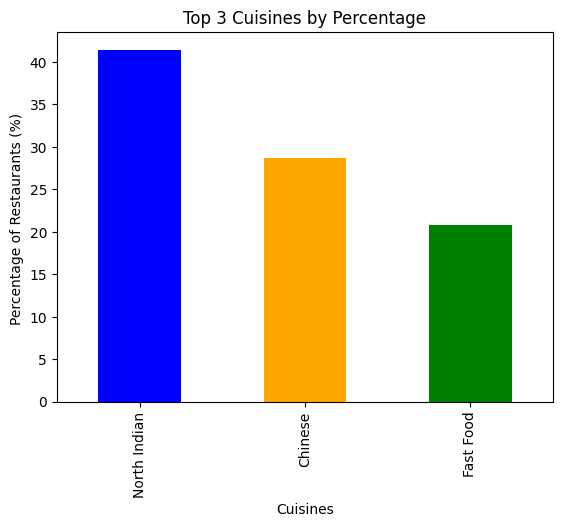

In [119]:
top_Cuisines_percentage.plot(kind = 'bar', color = ['blue', 'orange', 'green'] )
plt.title('Top 3 Cuisines by Percentage')
plt.xlabel('Cuisines')
plt.ylabel('Percentage of Restaurants (%) ')
plt.show()

### Step 9: The Insights

# Task 2: City Analysis
1. Identify the city with the highest number of restaurants in the dataset.
2. Calculate the average rating for restaurants in each city.
3. Determine the city with the highest average rating.


### Step 1: Data Processing

1. Handle missing values:

In [5]:
df = df.dropna(subset = ['City', 'Aggregate rating'])

2. Standardize city names:

In [23]:
df['City'] = df['City'].str.strip().str.lower()
print(df['City'].sample(10))

406     pocatello
1346      gurgaon
6120    new delhi
1713      gurgaon
7403    new delhi
3774    new delhi
8323        noida
506     tampa bay
2127      gurgaon
2108      gurgaon
Name: City, dtype: object


In [27]:
# Fix encoding issues
df['City'] = df['City'].str.encode('ascii', 'ignore').str.decode('ascii')


### Step 2: Identify the city with the highest number of restaurants
1.Number of restaurants in each city:

In [24]:
city_counts = df['City'].value_counts()
print(city_counts)

City
new delhi         5473
gurgaon           1118
noida             1080
faridabad          251
ghaziabad           25
                  ... 
lakes entrance       1
mohali               1
panchkula            1
bandung              1
randburg             1
Name: count, Length: 141, dtype: int64


2.City with the highest number of restaurants:

In [25]:
city_with_highest_number_of_restaurants = city_counts.idxmax()
print(f"City with the highest number of restaurants is {city_with_highest_number_of_restaurants}.")

City with the highest number of restaurants is new delhi.


### Step 3: Calculate the average rating for restaurants in each city

In [28]:
avg_rating = df.groupby('City')['Aggregate rating'].mean()
print(avg_rating)

City
abu dhabi          4.300000
agra               3.965000
ahmedabad          4.161905
albany             3.555000
allahabad          3.395000
                     ...   
waterloo           3.650000
weirton            3.900000
wellington city    4.250000
winchester bay     3.200000
yorkton            3.300000
Name: Aggregate rating, Length: 141, dtype: float64


In [31]:
# Reset the column name
avg_rating = avg_rating.reset_index().rename(columns = {'Aggregate rating': 'average_rating'})

### Step 4: Determine the city with the highest average rating

In [24]:
city_with_highest_average_rating = avg_rating.loc[avg_rating['average_rating'].idxmax()]
print(f"City with the highest average rating is {city_with_highest_average_rating['City']} with an average rating of {city_with_highest_average_rating['average_rating']:.2f}.")

City with the highest average rating is Inner City with an average rating of 4.90.


### Step 5: Visualize the Results

1. Bar chart of cities with the highest number of restaurants:

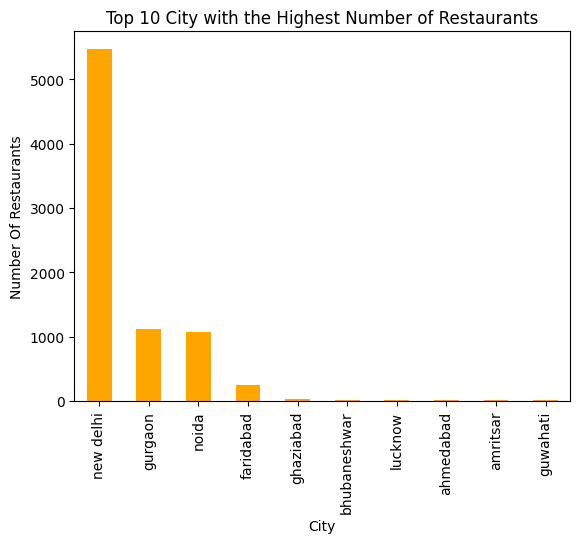

In [29]:
city_counts.head(10).plot(kind = 'bar', color = 'orange')
plt.title('Top 10 City with the Highest Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number Of Restaurants')
plt.show()

2. Bar chart of Cities by Average Rating:

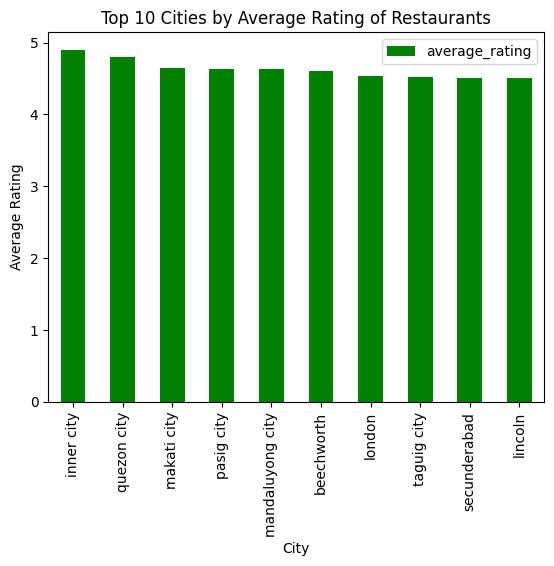

In [32]:
avg_rating_sorted = avg_rating.sort_values(by = 'average_rating', ascending = False)
avg_rating_sorted.head(10).plot(kind = 'bar', x = 'City', y = 'average_rating', color = 'green')
plt.title('Top 10 Cities by Average Rating of Restaurants')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()

### Step 6: The Insights

# Task 3: Price Range Distribution
1. Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
2. Calculate the percentage of restaurants in each price range category.

### Step 1: Data Processing

1. Handle missing values:

In [33]:
df = df.dropna(subset = ['Price range'])

### Step 2: Visualize the Distribution of Price Ranges
1. Number of restaurants in each price range

In [34]:
price_counts = df['Price range'].value_counts()
print(price_counts)

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


2. Histogram of Price Range vs. Number of Restaurants

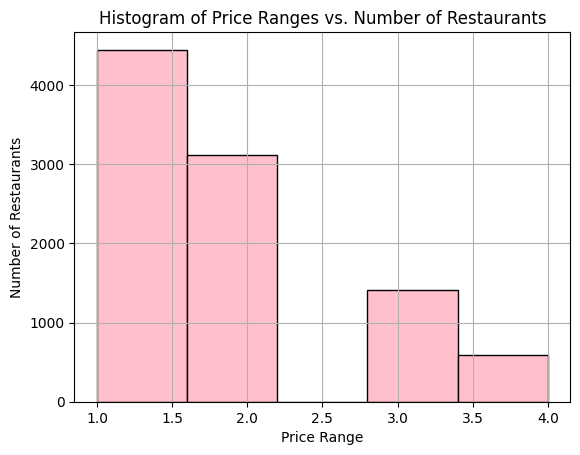

In [35]:
df['Price range'].hist(bins = 5, color = 'pink', edgecolor = 'black')
plt.title('Histogram of Price Ranges vs. Number of Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()


### Step 3: Percentage of restaurants in each price range category

1. Total number of restaurants

In [37]:
total_restaurants = len(df)
print(total_restaurants)

9551


2. Percentage for each price range

In [38]:
price_percentages = (price_counts / total_restaurants) * 100
print(price_percentages)

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


3. Bar chart of Price Range vs. Percentage of Restaurants

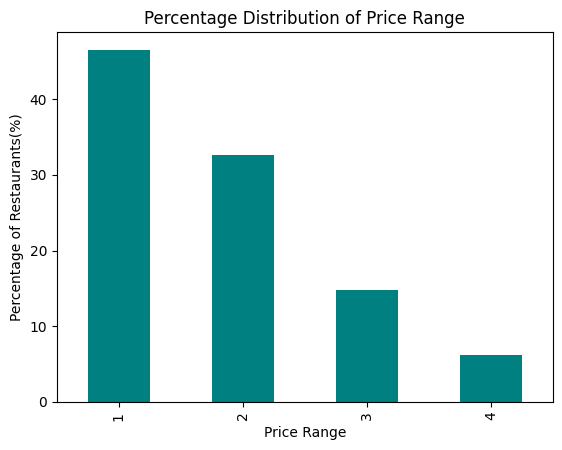

In [40]:
price_percentages.plot(kind = 'bar', color = 'teal')
plt.title('Percentage Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants(%)')
plt.show()

### Step 4: The Insights

# Task 4: Online Delivery 

1. Determine the percentage of restaurants that offer online delivery.
2. Compare the average ratings of restaurants with and without online delivery.

### Step 1: Data Processing

1. Handle missing values:

In [4]:
df = df.dropna(subset = ['Has Online delivery', 'Aggregate rating'])

2. Standardize the data:

In [7]:
# Reset the column name 
df = df.reset_index().rename(columns = {'Has Online delivery': 'online_delivery'})

In [9]:
df['online_delivery'] = df['online_delivery'].str.strip().str.lower()
print(df['online_delivery'].sample(10))

1951     no
3914    yes
8640    yes
5240     no
9295     no
3963     no
7963     no
6800     no
3340     no
4564     no
Name: online_delivery, dtype: object


### Step 2: Percentage of restaurants offering online delivery

1. Number of restaurants with or without online delivery:

In [10]:
online_delivery_counts = df['online_delivery'].value_counts()
print(online_delivery_counts)

online_delivery
no     7100
yes    2451
Name: count, dtype: int64


2. Percentage calculation:

In [13]:
total_restaurants = len(df)
online_delivery_percentage = (online_delivery_counts / total_restaurants) * 100
print(online_delivery_percentage)

online_delivery
no     74.337766
yes    25.662234
Name: count, dtype: float64


### Step 3: Comparison of the average ratings of restaurants offering online delivery versus those that do not

1. Calculation of average ratings using the group by function:

In [23]:
avg_ratings = df.groupby('online_delivery')['Aggregate rating'].mean()
print(avg_ratings)

online_delivery
no     2.465296
yes    3.248837
Name: Aggregate rating, dtype: float64


In [22]:
# Reset the column name
avg_ratings = avg_ratings.reset_index().rename(columns = {'Aggregate rating' : 'average_rating'})

2. Visualization:

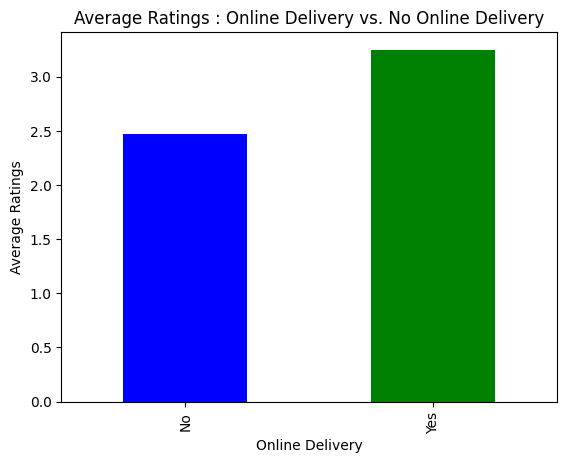

In [25]:
avg_ratings.plot(kind = 'bar', color = ['blue', 'green'], legend = False)
plt.title('Average Ratings : Online Delivery vs. No Online Delivery')
plt.xlabel('Online Delivery')
plt.ylabel('Average Ratings')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

### Step 4: The Insights